# Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

## Load the dataset

In [3]:
pdf = sns.load_dataset("penguins")
pdf.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### Get type of each column

- Use this to separate out numerical and textual columns

In [4]:
pdf.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [5]:
pdf.dtypes[ pdf.dtypes == "object" ]

species    object
island     object
sex        object
dtype: object

In [6]:
pdf.dtypes[ pdf.dtypes == "object" ].index.tolist()

['species', 'island', 'sex']

In [7]:
str_cols = pdf.dtypes[ pdf.dtypes == "object" ].index.tolist()
str_cols

['species', 'island', 'sex']

In [8]:
num_cols = pdf.dtypes[ ~ (pdf.dtypes == "object") ].index.tolist()
num_cols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

## Fill all missing values

In [9]:
pdf.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [10]:
for col in pdf[num_cols]:
  pdf[col] = pdf[col].fillna(pdf[col].mean())

In [11]:
pdf.isna().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

In [12]:
pdf.shape

(344, 7)

### One Hot Encoding

In [13]:
pdf4 = pdf[:]
pdf4.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,Male
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,Female
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,Female
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,Female


In [14]:
pdf4.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [15]:
pd.get_dummies(pdf.species, prefix="Spc")


,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
339,0,0,1
340,0,0,1
341,0,0,1
342,0,0,1


In [16]:
df_spc = pd.get_dummies(pdf4.species, prefix="Spc")
df_spc.head()

,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [17]:
df_isl = pd.get_dummies(pdf4.island, prefix="Isl")
df_isl.head()

,Isl_Biscoe,Isl_Dream,Isl_Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
# df_gdr = pd.get_dummies(pdf4.sex, prefix="Gdr_")
# df_gdr.head()

In [19]:
gndr = pdf4.sex.unique().tolist()
gndr

['Male', 'Female', nan]

In [20]:
gndr_d = {v:k for k,v in enumerate(gndr)}
gndr_d

{'Female': 1, 'Male': 0, nan: 2}

In [21]:
gndr_d

{'Female': 1, 'Male': 0, nan: 2}

In [22]:
pdf4.sex = pdf4.sex.map(gndr_d.get)

In [23]:
pd.concat([pdf4, df_spc, df_isl], axis=1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,0,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1,1,0,0,0,0,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1,1,0,0,0,0,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,2,1,0,0,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,43.92193,17.15117,200.915205,4201.754386,2,0,0,1,1,0,0
340,Gentoo,Biscoe,46.80000,14.30000,215.000000,4850.000000,1,0,0,1,1,0,0
341,Gentoo,Biscoe,50.40000,15.70000,222.000000,5750.000000,0,0,0,1,1,0,0
342,Gentoo,Biscoe,45.20000,14.80000,212.000000,5200.000000,1,0,0,1,1,0,0


In [24]:
pdf4_new = pd.concat([pdf4, df_spc, df_isl], axis=1)
pdf4_new.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,0,0,1
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,1,1,0,0,0,0,1
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,1,1,0,0,0,0,1
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,2,1,0,0,0,0,1
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,1,1,0,0,0,0,1


In [25]:
pdf4_new.drop(columns=['species', 'island'], axis=1)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,1,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,2,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,43.92193,17.15117,200.915205,4201.754386,2,0,0,1,1,0,0
340,46.80000,14.30000,215.000000,4850.000000,1,0,0,1,1,0,0
341,50.40000,15.70000,222.000000,5750.000000,0,0,0,1,1,0,0
342,45.20000,14.80000,212.000000,5200.000000,1,0,0,1,1,0,0


In [26]:
pdf4_new = pdf4_new.drop(columns=['species', 'island'], axis=1)
pdf4_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
0,39.10000,18.70000,181.000000,3750.000000,0,1,0,0,0,0,1
1,39.50000,17.40000,186.000000,3800.000000,1,1,0,0,0,0,1
2,40.30000,18.00000,195.000000,3250.000000,1,1,0,0,0,0,1
3,43.92193,17.15117,200.915205,4201.754386,2,1,0,0,0,0,1
4,36.70000,19.30000,193.000000,3450.000000,1,1,0,0,0,0,1


In [27]:
pdf4_new.shape

(344, 11)

In [28]:
pdf4_new.isna().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
Spc_Adelie           0
Spc_Chinstrap        0
Spc_Gentoo           0
Isl_Biscoe           0
Isl_Dream            0
Isl_Torgersen        0
dtype: int64

## Extract Train dataset and Test dataset

### 2. Separate out independent and target variables

- `flipper_length_mm` : independent variable [ X ]
- `body_mass_g`       : Target variable [ y ]

In [29]:
X = pdf4_new.drop('body_mass_g', axis=1)
y = pdf4_new.loc[:, 'body_mass_g']

X.shape, y.shape

((344, 10), (344,))

### 3. Split the dataset into train and test with 25% data in test

### Can be easily established using sklearn

Usually go for 70-30 split

or 80-20

or 75-25

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
                                                      X, 
                                                      y, 
                                                      test_size=0.25, 
                                                      random_state=1234
                                                   )

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((258, 10), (258,), (86, 10), (86,))

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
mmscaler = MinMaxScaler()
X_train_scaled_mm_vals = mmscaler.fit_transform(X_train)
X_train_scaled_mm = pd.DataFrame(X_train_scaled_mm_vals, columns=X_train.columns.tolist())
X_train_scaled_mm.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
0,0.243636,0.488095,0.137931,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.534545,0.142857,0.741379,0.5,0.0,0.0,1.0,1.0,0.0,0.0
2,0.512727,0.214286,0.844828,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.654545,0.571429,0.310345,0.5,0.0,1.0,0.0,0.0,1.0,0.0
4,0.123636,0.523810,0.310345,0.5,1.0,0.0,0.0,0.0,0.0,1.0


In [34]:
X_train_scaled_mm.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000
mean,0.432124,0.475707,0.498123,0.281008,0.437984,0.189922,0.372093,0.488372,0.348837,0.162791
std,0.196185,0.237802,0.242639,0.285014,0.497103,0.393002,0.484302,0.500836,0.477529,0.369892
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.270000,0.276786,0.310345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.450909,0.494048,0.431034,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.596364,0.654762,0.724138,0.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
scaled_X_test_vals = mmscaler.transform(X_test)
X_test_scaled_mm = pd.DataFrame(scaled_X_test_vals, columns=X_test.columns)
X_test_scaled_mm.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
0,0.156364,0.476190,0.206897,0.5,1.0,0.0,0.0,1.0,0.0,0.0
1,0.621818,0.250000,0.844828,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.385455,0.619048,0.413793,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.298182,0.642857,0.413793,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.367273,0.642857,0.137931,0.5,1.0,0.0,0.0,0.0,1.0,0.0


In [36]:
X_test_scaled_mm.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,sex,Spc_Adelie,Spc_Chinstrap,Spc_Gentoo,Isl_Biscoe,Isl_Dream,Isl_Torgersen
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.423181,0.502009,0.499783,0.244186,0.453488,0.220930,0.325581,0.488372,0.395349,0.116279
std,0.204179,0.224105,0.240414,0.262837,0.500752,0.417307,0.471340,0.502797,0.491793,0.322439
min,0.050909,0.071429,0.137931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249091,0.315476,0.310345,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.427671,0.559524,0.431034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.581818,0.666667,0.655172,0.500000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,0.941818,0.964286,1.017241,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
from sklearn.neighbors import KNeighborsRegressor as KNN_Reg

In [38]:
knn_model = KNN_Reg(n_neighbors=10)
knn_model.fit(X_train_scaled_mm, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [39]:
y_learnt_knn = knn_model.predict(X_train_scaled_mm)

In [40]:
y_pred_knn = knn_model.predict(X_test_scaled_mm)

## Calculate RMSE

1. Let's first do it for the information learnt from the train data

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
rmse = lambda actual,pred : np.sqrt(mse(actual, pred))

In [43]:
rmse_train_knn = rmse(y_train, y_learnt_knn)
rmse_test_knn  = rmse(y_test, y_pred_knn)

rmse_train_knn, rmse_test_knn

(269.98269410299235, 325.1011028721019)

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score_train_knn = r2_score(y_train, y_learnt_knn)
r2_score_train_knn.round(4)

0.8853

In [46]:
r2_score_knn = r2_score(y_test, y_pred_knn)
r2_score_knn.round(4)

0.8358

In [47]:
def knn_scores(k=5):
  knn_model = KNN_Reg(n_neighbors=k)
  knn_model.fit(X_train_scaled_mm, y_train)
  y_learnt_knn = knn_model.predict(X_train_scaled_mm)
  y_pred_knn = knn_model.predict(X_test_scaled_mm)
  r2_score_train_knn = r2_score(y_train, y_learnt_knn)
  r2_score_knn = r2_score(y_test, y_pred_knn)

  return r2_score_train_knn.round(4), r2_score_knn.round(4)


In [48]:
knn_scores(k=5)

(0.8953, 0.8386)

In [49]:
knn_scores(k=10)

(0.8853, 0.8358)

In [63]:
k_values = [(num,knn_scores(k=num)) for num in range(1,21)]
k_values[0][0]

1

# Home work
1. plot the line graph of traine and test scores of knn model with k values ranging from 1 to 100 

2. In this graph identify the regions for 
    1. over fitting
      => good in class bad in exam 
    2. under fitting
      => Bad in class(50%) bad in exam(50%)
    3. Ideal model
      => Both are similar with best results good in exam
1.
class = 95
exam =  70
2.
72, 69



In [72]:
k_value = [(num,knn_scores(k=num)) for num in range(1,101)]
k_value[3][1]

(0.9097, 0.8533)

In [79]:
k_val   = []
k_train = []
k_test  = []
k = 1
for num in range(1,101):
  train,test = knn_scores(k=num)
  k_val.append(num)
  k_train.append(train)
  k_test.append(test)

knn = pd.DataFrame({"K_values":k_val,
                       "k_train":k_train,
                       "k_test":k_test})
knn

,K_values,k_train,k_test
0,1,1.0000,0.7543
1,2,0.9378,0.8165
2,3,0.9185,0.8457
3,4,0.9097,0.8533
4,5,0.8953,0.8386
...,...,...,...
95,96,0.7346,0.6446
96,97,0.7364,0.6462
97,98,0.7375,0.6478
98,99,0.7389,0.6491


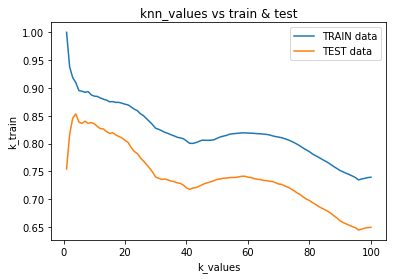

In [89]:
plt.plot(knn.K_values, knn.k_train, label = "TRAIN data" )
plt.plot(knn.K_values, knn.k_test, label = "TEST data")
plt.title('knn_values vs train & test')
plt.xlabel('k_values')
plt.ylabel('k_train')
plt.legend()
plt.show()

In [65]:
def sum_num():
  a = 10+10
  b = 10+20
  return a,b

on,to = sum_num()
on

20

In [ ]:
()